# Lab 2. Data Analytics

### Exercise 1. DNA Translation

* Deoxyribonucleic acid (DAN), is a molecule found in the cells of all living organisms.

* DNA is a long, double-stranded molecule made up of repeating units called nucleotides.

* We can think of DNA as one dimensional string of characters with four characters to choose from.

* These characters are A, C, G, and T, which stands for the first letters of the four nucleotides used to construct DNA.

* Adenine, Cytosine, Guanine, and Thymine.

* Each unique three character sequence of nucleotides, sometimes called a nucleotide triplet, corresponds to one amino acid.

* The sequence of amino acids is unique for each type of protein and all proteins are built from the same set of just 20 amino acids for all living things.

* With the provided DNA sequence you need to translate the DNA sequence into amino acids.

* The input to our program is going to be a DNA sequence that consists of a four letter alphabet.

* We then read this sequence three letters at a time, translate each triplet to a single letter that stands for a specific amino acid, and then proceed to the next set of three letters.

In [55]:
# Exercise 1
import pandas as pd
import os
# Define the genetic code chart (codon-to-amino-acid mapping)
genetic_code = { 'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W' }

# Input DNA sequence
#Reading and formating the .txt file
def read_dna_sequence_from_file(file_path):
    df = pd.read_csv(file_path, header=None)
    dna_sequence = ''.join(df[0].tolist())
    return dna_sequence

path = 'dna.txt'
#If file exist we read from it else we pass the dna sequence
if os.path.isfile(path):
    dna_sequence = read_dna_sequence_from_file(path)
else:
    dna_sequence = "GGTCAGAAAAAGCCCTCTCCATGTCTACTCACGATACATCCCTGAAAACCACTGAGGAAGTGGCTTTTCAGATCATCTTGCTTTGCCAGTTTGGGGTTGGGACTTTTGCCAATGTATTTCTCTTTGTCTATAATTTCTCTCCAATCTCGACTGGTTCTAAACAGAGGCCCAGACAAGTGATTTTAAGACACATGGCTGTGGCCAATGCCTTAACTCTCTTCCTCACTATATTTCCAAACAACATGATGACTTTTGCTCCAATTATTCCTCAAACTGACCTCAAATGTAAATTAGAATTCTTCACTCGCCTCGTGGCAAGAAGCACAAACTTGTGTTCAACTTGTGTTCTGAGTATCCATCAGTTTGTCACACTTGTTCCTGTTAATTCAGGTAAAGGAATACTCAGAGCAAGTGTCACAAACATGGCAAGTTATTCTTGTTACAGTTGTTGGTTCTTCAGTGTCTTAAATAACATCTACATTCCAATTAAGGTCACTGGTCCACAGTTAACAGACAATAACAATAACTCTAAAAGCAAGTTGTTCTGTTCCACTTCTGATTTCAGTGTAGGCATTGTCTTCTTGAGGTTTGCCCATGATGCCACATTCATGAGCATCATGGTCTGGACCAGTGTCTCCATGGTACTTCTCCTCCATAGACATTGTCAGAGAATGCAGTACATATTCACTCTCAATCAGGACCCCAGGGGCCAAGCAGAGACCACAGCAACCCATACTATCCTGATGCTGGTAGTCACATTTGTTGGCTTTTATCTTCTAAGTCTTATTTGTATCATCTTTTACACCTATTTTATATATTCTCATCATTCCCTGAGGCATTGCAATGACATTTTGGTTTCGGGTTTCCCTACAATTTCTCCTTTACTGTTGACCTTCAGAGACCCTAAGGGTCCTTGTTCTGTGTTCTTCAACTGTTGAAAGCCAGAGTCACTAAAAATGCCAAACACAGAAGACAGCTTTGCTAATACCATTAAATACTTTATTCCATAAATATGTTTTTAAAAGCTTGTATGAACAAGGTATGGTGCTCACTGCTATACTTATAAAAGAGTAAGGTTATAATCACTTGTTGATATGAAAAGATTTCTGGTTGGAATCTGATTGAAACAGTGAGTTATTCACCACCCTCCATTCTCT"

# Function to translate a DNA sequence into amino acids
def translate_dna_to_amino_acids(dna_sequence, genetic_code):
    amino_acids = []
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    
    i = 0
    while i < len(dna_sequence):
        codon = dna_sequence[i:i+3]
        if codon == start_codon:
            amino_acids.append(genetic_code[codon])
            i += 3
            while i < len(dna_sequence):
                codon = dna_sequence[i:i+3]
                if codon in stop_codons:
                    break
                amino_acids.append(genetic_code.get(codon, 'Unknown'))
                i += 3
        else:
            i += 1

    return amino_acids

# Translate the DNA sequence
amino_acids = translate_dna_to_amino_acids(dna_sequence, genetic_code)

# Print the resulting amino acid sequence
print("Amino Acid Sequence:")
print("-".join(amino_acids))

Amino Acid Sequence:
M-S-T-H-D-T-S-L-K-T-T-E-E-V-A-F-Q-I-I-L-L-C-Q-F-G-V-G-T-F-A-N-V-F-L-F-V-Y-N-F-S-P-I-S-T-G-S-K-Q-R-P-R-Q-V-I-L-R-H-M-A-V-A-N-A-L-T-L-F-L-T-I-F-P-N-N-M-M-T-F-A-P-I-I-P-Q-T-D-L-K-C-K-L-E-F-F-T-R-L-V-A-R-S-T-N-L-C-S-T-C-V-L-S-I-H-Q-F-V-T-L-V-P-V-N-S-G-K-G-I-L-R-A-S-V-T-N-M-A-S-Y-S-C-Y-S-C-W-F-F-S-V-L-N-N-I-Y-I-P-I-K-V-T-G-P-Q-L-T-D-N-N-N-N-S-K-S-K-L-F-C-S-T-S-D-F-S-V-G-I-V-F-L-R-F-A-H-D-A-T-F-M-S-I-M-V-W-T-S-V-S-M-V-L-L-L-H-R-H-C-Q-R-M-Q-Y-I-F-T-L-N-Q-D-P-R-G-Q-A-E-T-T-A-T-H-T-I-L-M-L-V-V-T-F-V-G-F-Y-L-L-S-L-I-C-I-I-F-Y-T-Y-F-I-Y-S-H-H-S-L-R-H-C-N-D-I-L-V-S-G-F-P-T-I-S-P-L-L-L-T-F-R-D-P-K-G-P-C-S-V-F-F-N-C-M-P-N-T-E-D-S-F-A-N-T-I-K-Y-F-I-P-M-F-L-K-A-C-M-N-K-V-W-C-S-L-L-Y-L-M-K-R-F-L-V-G-I


### Exercise 2. Net Promoter Score

* Deoxyribonucleic acid (DAN), is a molecule found in the cells of all living organisms.

The highest scored country destination is: 1 with an average NPS of 0.6711409395973155


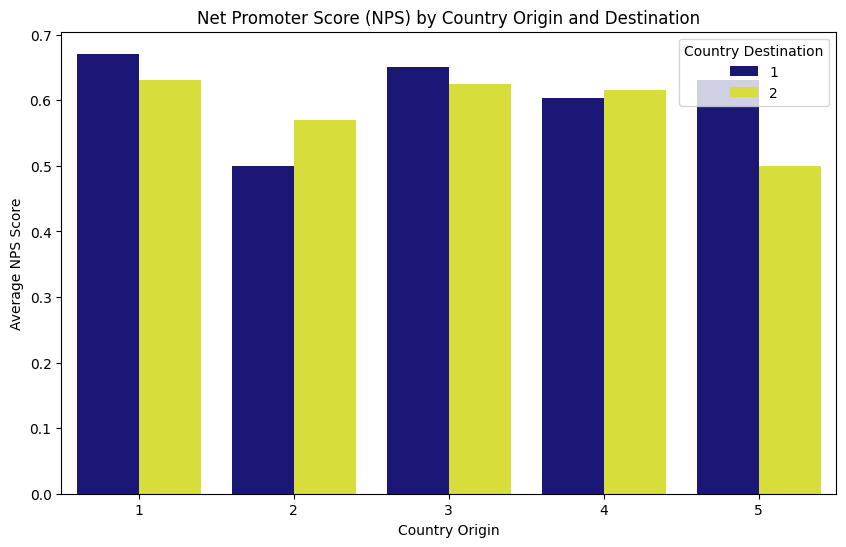

In [1]:
# Exercise 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
df1 = pd.DataFrame(np.random.randint(9, 11, size=(1000, 1)), columns=['Would you recommend the product?'])
df2 = pd.DataFrame(np.random.randint(7, 9, size=(400, 1)), columns=['Would you recommend the product?'])
df3 = pd.DataFrame(np.random.randint(0, 7, size=(100, 1)), columns=['Would you recommend the product?'])

df = pd.concat([df1, df2, df3], ignore_index=True)

df['country_origin'] = np.random.randint(1, 6, df.shape[0])
df['country_destination'] = np.random.randint(1, 3, df.shape[0])

# Calculate NPS for each country
df['nps_category'] = pd.cut(df['Would you recommend the product?'], bins=[-1, 6, 8, 10], labels=['Detractor', 'Passive', 'Promoter'])
df['nps_score'] = df['nps_category'].map({'Detractor': -1, 'Passive': 0, 'Promoter': 1})

# Convert categorical data to numeric
df['nps_score'] = pd.to_numeric(df['nps_score'])

# Group by origin and destination countries and calculate NPS
nps_results = df.groupby(['country_origin', 'country_destination']).agg({'nps_score': 'mean'}).reset_index()
max_nps = nps_results['nps_score'].max()
highest_scored_country = nps_results.loc[nps_results['nps_score'] == max_nps, 'country_destination'].values[0]
print(f"The highest scored country destination is: {highest_scored_country} with an average NPS of {max_nps}")


# Visualize NPS results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='country_origin', y='nps_score', hue='country_destination', data=nps_results, palette='plasma')
plt.title('Net Promoter Score (NPS) by Country Origin and Destination')
plt.xlabel('Country Origin')
plt.ylabel('Average NPS Score')
plt.legend(title='Country Destination')
plt.show()
